In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
import seaborn as sns
import math
import scipy.stats as stats
import statsmodels.formula.api as smf
import calendar
import time
import glob
import gc
import os
import warnings
import locale
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn import linear_model
from sklearn.covariance import EmpiricalCovariance, MinCovDet

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## DS_2_4_2 DATA CLEANUP AND EXPLORATION

In [2]:
#These are already included in data text file. Just added here for reference.
my_cols = [
            'City',
            'Pop',
            'Violent_cr',
            'Mrdr_manslter',
            'Rape1',
            'Rape2',
            'Robbery',
            'Agg_asslt',
            'Prop_cr',
            'Burg',
            'Larc_thft',
            'Mtr_vhcl_thft',
            'Arson3'
            ]


In [3]:

from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'English_United States.1252'

In [4]:
df = pd.read_csv("crime_data_ny_2013.txt",encoding="utf-8", thousands=',')
df.head()


,City,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            348 non-null int64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           348 non-null int64
dtypes: int64(12), object(1)
memory usage: 35.4+ KB


In [6]:
df.replace('', np.nan, inplace=True)

In [7]:
df.isnull().sum()

City               0
Pop                0
Violent_cr         0
Mrdr_manslter      0
Rape1            348
Rape2              0
Robbery            0
Agg_asslt          0
Prop_cr            0
Burg               0
Larc_thft          0
Mtr_vhcl_thft      0
Arson3           161
dtype: int64

In [8]:
df.fillna(0,inplace=True)
df.isnull().sum()

City             0
Pop              0
Violent_cr       0
Mrdr_manslter    0
Rape1            0
Rape2            0
Robbery          0
Agg_asslt        0
Prop_cr          0
Burg             0
Larc_thft        0
Mtr_vhcl_thft    0
Arson3           0
dtype: int64

In [9]:
df = df.astype({            
                'City':'object',
                'Pop':'int64',
                'Violent_cr':'int64',
                'Mrdr_manslter':'int64',
                'Rape1':'int64',
                'Rape2':'int64',
                'Robbery':'int64',
                'Agg_asslt':'int64',
                'Prop_cr':'int64',
                'Burg':'int64',
                'Larc_thft':'int64',
                'Mtr_vhcl_thft':'int64',
                'Arson3':'int64'
                })

In [648]:
df["Pop_squared"] = np.square(df["Pop"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            348 non-null int64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           348 non-null int64
Pop_squared      348 non-null int64
dtypes: int64(13), object(1)
memory usage: 38.1+ KB


In [162]:
df.describe()

,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3
count,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,0.000,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.006
std,450037.368,2815.269,18.304,0.000,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,7.885
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,0.000,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,0.000,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,0.000
max,8396126.000,52384.000,335.000,0.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [179]:
print("Percent of Zeros\n================================")
print("Violent_cr {:0.2f}".format(df[(df['Violent_cr']==0)].shape[0]/df.shape[0]))
print("Mrdr_manslter {:0.2f}".format(df[(df['Mrdr_manslter']==0)].shape[0]/df.shape[0]))
print("Rape2 {:0.2f}".format(df[(df['Rape2']==0)].shape[0]/df.shape[0]))
print("Robbery {:0.2f}".format(df[(df['Robbery']==0)].shape[0]/df.shape[0]))
print("Agg_asslt {:0.2f}".format(df[(df['Agg_asslt']==0)].shape[0]/df.shape[0]))
print("Prop_cr {:0.2f}".format(df[(df['Prop_cr']==0)].shape[0]/df.shape[0]))
print("Burg {:0.2f}".format(df[(df['Burg']==0)].shape[0]/df.shape[0]))
print("Larc_thft {:0.2f}".format(df[(df['Larc_thft']==0)].shape[0]/df.shape[0]))
print("Mtr_vhcl_thft {:0.2f}".format(df[(df['Mtr_vhcl_thft']==0)].shape[0]/df.shape[0]))
print("Arson3 {:0.2f}".format(df[(df['Arson3']==0)].shape[0]/df.shape[0]))


Percent of Zeros
Violent_cr 0.15
Mrdr_manslter 0.86
Rape2 0.59
Robbery 0.40
Agg_asslt 0.19
Prop_cr 0.02
Burg 0.06
Larc_thft 0.02
Mtr_vhcl_thft 0.27
Arson3 0.84


# Select data to play with

In [649]:
df2 = df.loc[((df["City"] != "")), [
                                    "City",
                                    "Pop",
                                    "Pop_squared",   
                                    "Violent_cr",
                                    "Mrdr_manslter",
                                    "Rape2", 
                                    "Robbery",
                                    "Agg_asslt",
                                    "Burg",
                                    "Larc_thft",
                                    "Mtr_vhcl_thft", 
                                    "Prop_cr"
                                    ]]
df_jittered2 = df2
df_jittered2.shape[0]


348

# Clean population variable

In [360]:
#df_jittered2["Pop"].dropna().sample(90).describe()

count       90.000
mean     18198.267
std      29476.598
min        656.000
25%       3517.750
50%       8436.500
75%      22659.750
max     210562.000
Name: Pop, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


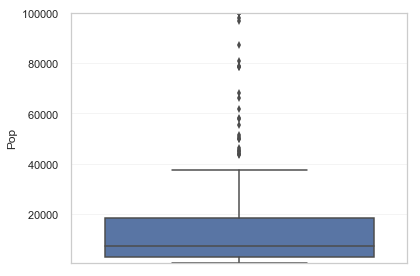

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,791,8,30,227,526,705,3243,142,4090,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,68,204,1882,32,2118,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


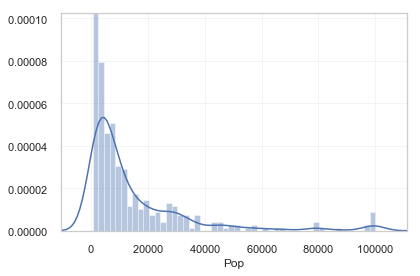

In [450]:
df_jittered2.head(10)
df_jittered2['Pop'] = df.apply(lambda x: 100000 if x['Pop'] > 100000 else x['Pop'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Pop"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Pop"],bins=50)
df_jittered2.head(10)

# Clean population squared variable

In [652]:
df_jittered2["Pop_squared"].dropna().sample(90).describe()

count           90.000
mean     460736197.400
std     1291725790.850
min         378225.000
25%        8302343.250
50%       44736188.500
75%      226187971.750
max     7000000000.000
Name: Pop_squared, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


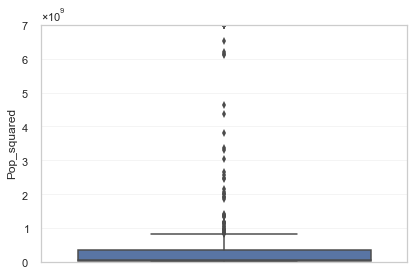

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


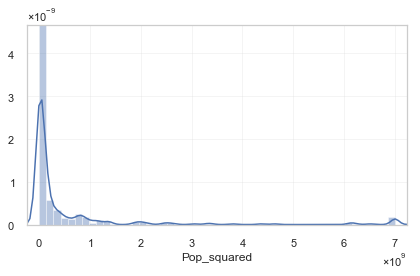

In [653]:
df_jittered2['Pop_squared'] = df.apply(lambda x:  7000000000 if x['Pop_squared'] >  7000000000 else x['Pop_squared'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Pop_squared"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Pop_squared"],bins=50)

# Clean violent crime variable

In [383]:
#df_jittered2["Violent_cr"].dropna().sample(90).describe()

count     90.000
mean      38.889
std      137.602
min        0.000
25%        2.000
50%        8.000
75%       18.000
max     1036.000
Name: Violent_cr, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


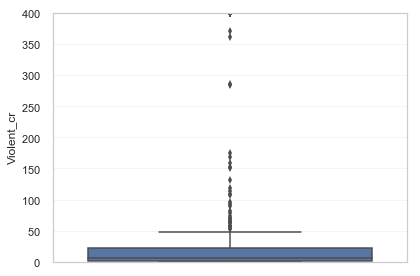

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,400,8,30,227,526,705,3243,142,4090,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,68,204,1882,32,2118,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


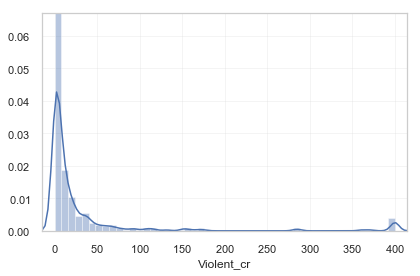

In [451]:

df_jittered2.head(10)
df_jittered2['Violent_cr'] = df.apply(lambda x: 400 if x['Violent_cr'] > 400 else x['Violent_cr'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Violent_cr"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Violent_cr"],bins=50)
df_jittered2.head(10)

# Clean property Agg_asslt variable

In [403]:
df2["Agg_asslt"].dropna().sample(90).describe()

count    90.000
mean     18.278
std      39.392
min       0.000
25%       1.000
50%       5.500
75%      18.000
max     259.000
Name: Agg_asslt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


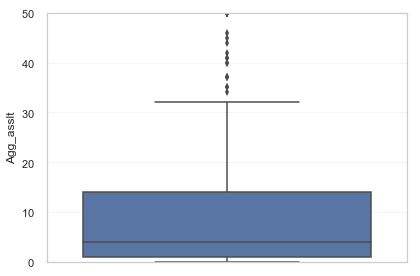

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,400,8,30,227,50,705,3243,142,4090,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,50,204,1882,32,2118,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


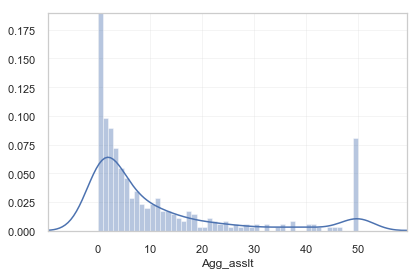

In [452]:


df_jittered2.head(10)
df_jittered2['Agg_asslt'] = df.apply(lambda x: 50 if x['Agg_asslt'] > 50 else x['Agg_asslt'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Agg_asslt"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Agg_asslt"],bins=50)
df_jittered2.head(10)

# Clean burglary variable

In [497]:
df2["Burg"].dropna().sample(90).describe()

count     90.000
mean      82.800
std      370.941
min        0.000
25%        7.000
50%       17.000
75%       49.500
max     3458.000
Name: Burg, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


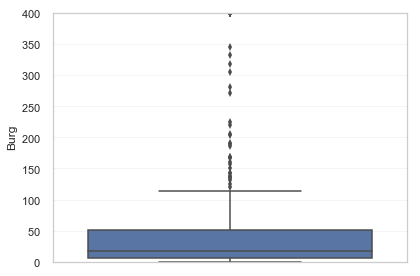

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,400,8,30,227,50,400,3243,142,2000,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,50,204,1882,32,2000,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


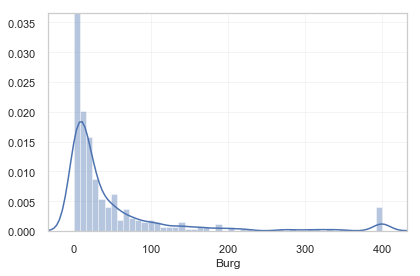

In [498]:
df_jittered2.head(10)
df_jittered2['Burg'] = df.apply(lambda x: 400 if x['Burg'] > 400 else x['Burg'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Burg"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Burg"],bins=50)
df_jittered2.head(10)

# Clean larceny and theft crime variable

In [537]:
df2["Larc_thft"].dropna().sample(90).describe()

count       90.000
mean      1603.156
std      12415.495
min          0.000
25%         36.250
50%         67.500
75%        253.500
max     117931.000
Name: Larc_thft, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


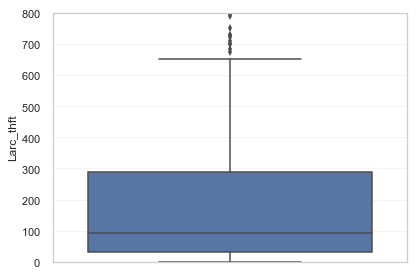

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,400,8,30,227,50,400,800,142,2000,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,50,204,800,32,2000,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


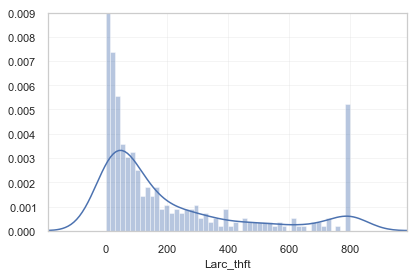

In [538]:
df_jittered2.head(10)
df_jittered2['Larc_thft'] = df.apply(lambda x: 800 if x['Larc_thft'] > 800 else x['Larc_thft'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Larc_thft"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Larc_thft"],bins=50)
df_jittered2.head(10)

# Clean motor vehicle theft crime variable

In [594]:
df2["Mtr_vhcl_thft"].dropna().sample(90).describe()

count     90.000
mean     103.733
std      788.166
min        0.000
25%        0.000
50%        2.000
75%        8.000
max     7434.000
Name: Mtr_vhcl_thft, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


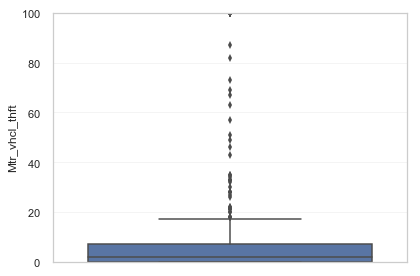

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,400,8,30,227,50,400,800,100,2000,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,50,204,800,32,2000,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


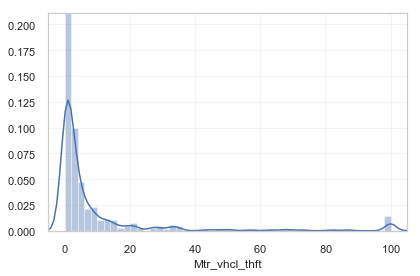

In [595]:
df_jittered2.head(10)
df_jittered2['Mtr_vhcl_thft'] = df.apply(lambda x: 100 if x['Mtr_vhcl_thft'] > 100 else x['Mtr_vhcl_thft'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Mtr_vhcl_thft"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Mtr_vhcl_thft"],bins=50)
df_jittered2.head(10)

# Clean property crime variable

In [207]:
#df_jittered2["Violent_cr"].dropna().sample(60).describe()

count      60.000
mean      418.017
std      1325.392
min         0.000
25%        42.500
50%       125.500
75%       321.250
max     10051.000
Name: Prop_cr, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


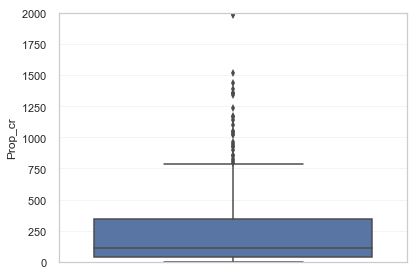

,City,Pop,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr,Pop_squared
0,Adams Village,1861,0,0,0,0,0,2,10,0,12,3463321
1,Addison Town and Village,2577,3,0,0,0,3,3,20,1,24,6640929
2,Akron Village,2846,3,0,0,0,3,1,15,0,16,8099716
3,Albany,97956,400,8,30,227,50,400,800,100,2000,9595377936
4,Albion Village,6388,23,0,3,4,16,53,165,5,223,40806544
5,Alfred Village,4089,5,0,0,3,2,10,36,0,46,16719921
6,Allegany Village,1781,3,0,0,0,3,0,10,0,10,3171961
7,Amherst Town,100000,107,1,7,31,50,204,800,32,2000,13993943616
8,Amityville Village,9519,9,0,2,4,3,16,188,6,210,90611361
9,Amsterdam,18182,30,0,0,12,18,99,291,15,405,330585124


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


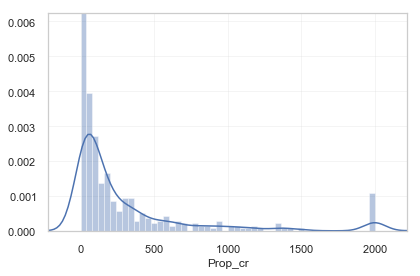

In [596]:

df_jittered2['Prop_cr'] = df.apply(lambda x: 2000 if x['Prop_cr'] > 2000 else x['Prop_cr'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Prop_cr"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Prop_cr"],bins=50)
df_jittered2.head(10)


# Inspection

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


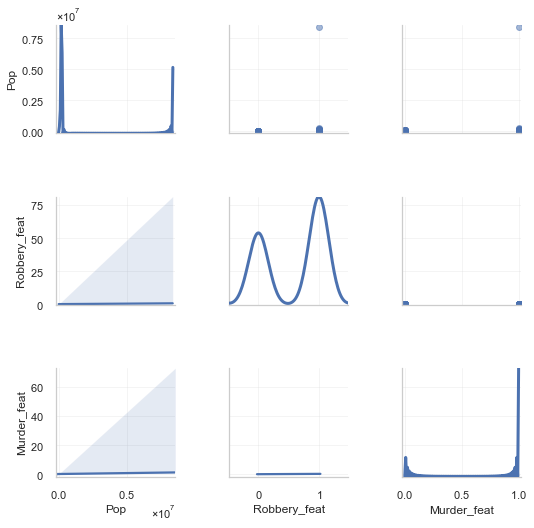

In [764]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df3[['Pop','Robbery_feat','Murder_feat']], diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

# Features

In [658]:
# Set features

features['Murder_feat'] = np.where(df_jittered2['Mrdr_manslter']>0, 1, 0)
features['Rape2_feat'] = np.where(df_jittered2['Rape2']>0, 1, 0)
features['Robbery_feat'] = np.where(df_jittered2['Robbery']>0, 1, 0)

print(df_jittered2['Mrdr_manslter'].groupby(features['Murder_feat']).describe())
print(df_jittered2['Rape2'].groupby(features['Rape2_feat']).describe())
print(df_jittered2['Robbery'].groupby(features['Robbery_feat']).describe())


              count   mean    std   min   25%   50%   75%     max
Murder_feat                                                      
0           299.000  0.000  0.000 0.000 0.000 0.000 0.000   0.000
1            49.000 11.122 48.098 1.000 1.000 1.000 3.000 335.000
             count   mean    std   min   25%   50%   75%      max
Rape2_feat                                                       
0          204.000  0.000  0.000 0.000 0.000 0.000 0.000    0.000
1          144.000 14.174 93.495 1.000 1.000 3.000 5.000 1112.000
               count    mean      std   min   25%   50%    75%       max
Robbery_feat                                                            
0            139.000   0.000    0.000 0.000 0.000 0.000  0.000     0.000
1            209.000 121.388 1329.475 1.000 1.000 4.000 12.000 19170.000


## DS 2_4_4 Model

 ## 𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛^2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [757]:

#del df3

In [758]:
# Instantiate and fit our model.
df3=pd.DataFrame()

df3['Pop'] = df_jittered2['Pop']
df3['Pop2'] = df_jittered2['Pop_squared']
df3['Murder_feat'] = features['Murder_feat']
df3['Robbery_feat'] = features['Robbery_feat']
df3['Violent_cr'] = df_jittered2['Violent_cr']
df3['Agg_asslt'] = df_jittered2['Agg_asslt']
df3['Burg'] = df_jittered2['Burg']
df3['Larc_thft'] = df_jittered2['Larc_thft']
df3['Mtr_vhcl_thft'] = df_jittered2['Mtr_vhcl_thft']

df3['Prop_cr'] = df_jittered2['Prop_cr']

regr = linear_model.LinearRegression()
Y = df3['Prop_cr'].values.reshape(-1, 1)
#X = df3[['pop_mur_rob','pop2_mur_rob','Murder_feat','Robbery_feat']]
X = df3[['Pop','Robbery_feat','Murder_feat']]
regr.fit(X, Y)

# Inspect the results.
print(X[:5])

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

     Pop  Robbery_feat  Murder_feat
0   1861             0            0
1   2577             0            0
2   2846             0            0
3  97956             1            1
4   6388             1            0

Coefficients: 
 [[1.68728222e-02 1.06994709e+02 6.07383740e+02]]

Intercept: 
 [-32.72226824]

R-squared:
0.99344854357257


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


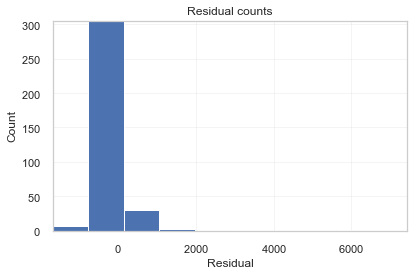

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


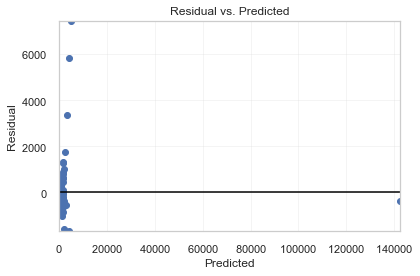

In [759]:

# Extract predicted values.
predicted = regr.predict(X).ravel()

actual = df3['Prop_cr']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks good.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Homoscedasticity does not look good. 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [760]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Pop,Robbery_feat,Murder_feat
Pop,1.000,0.064,0.162
Robbery_feat,0.064,1.000,0.313
Murder_feat,0.162,0.313,1.000


# Robust Covariance

In [762]:
# Variance is not steady. Therefore, a good approach for obtaining a robust correlation is to use MinCovDet robust covariance.

#X=np.array([features["Pop"], features["Pop_squared"], features["Robbery_Occured"], features["Murder_Occured"], features["Prop_cr"]]).reshape(-1,5)
X = df3[['Pop','Robbery_feat','Murder_feat','Robbery_feat']]
gen_cov = np.eye(4)



X = np.dot(X, gen_cov)
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)
robust_cov.covariance_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:646: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


array([[2.36049973e+08, 3.43802896e+03, 2.41447747e+03, 3.43802896e+03],
       [3.43802896e+03, 2.41686851e-01, 4.75605536e-02, 2.41686851e-01],
       [2.41447747e+03, 4.75605536e-02, 1.08269896e-01, 4.75605536e-02],
       [3.43802896e+03, 2.41686851e-01, 4.75605536e-02, 2.41686851e-01]])